In [1]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pydotplus

In [3]:
penguins_data = pd.read_csv("penguins.csv")
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
#Convert categorical to numerical and fill nan values with mean

penguins_data.sex = pd.get_dummies(penguins_data.sex)
penguins_data.island = pd.Categorical(penguins_data.island, categories=penguins_data.island.unique()).codes
penguins_data.species = pd.Categorical(penguins_data.species, categories=penguins_data.species.unique()).codes

penguins_data.fillna(penguins_data.mean(), inplace=True)

In [20]:
# Create new column called Class that is a combination of the "sex" and "species" columns

spec = pd.DataFrame(np.where(penguins_data['species'] == 0, 'Adelie',
                        (np.where(penguins_data['species'] == 1, 'Chinstrap', 'Gentoo'))), columns=['spec'])
sex = pd.DataFrame(np.where(penguins_data['sex'] == 0, 'Male', "Female"), columns=['sex'])

new_col = pd.concat([spec, sex], axis=1)
new_col['class'] = new_col['sex'] + " " + new_col['spec']
penguins_data = pd.concat([penguins_data, new_col['class']], axis=1)

penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,class
0,0,0,39.10000,18.70000,181.000000,3750.000000,0,Male Adelie
1,0,0,39.50000,17.40000,186.000000,3800.000000,1,Female Adelie
2,0,0,40.30000,18.00000,195.000000,3250.000000,1,Female Adelie
3,0,0,43.92193,17.15117,200.915205,4201.754386,0,Male Adelie
4,0,0,36.70000,19.30000,193.000000,3450.000000,1,Female Adelie


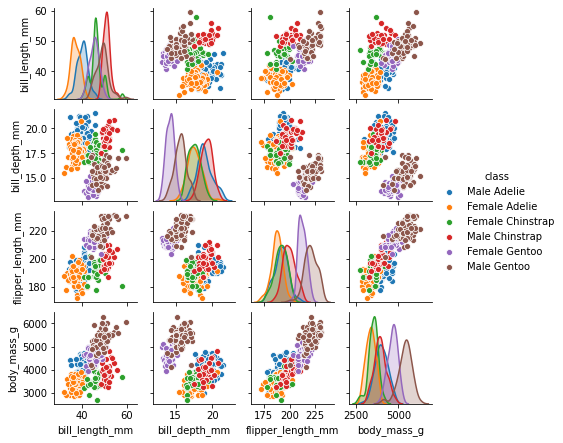

In [21]:
sns.pairplot(penguins_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'class']],
                 hue='class', height=1.5)
plt.show()

In [22]:
def two_features_plot(feature1, feature2, data, classes):
    penguins = data
    concat_features = pd.concat([feature1, feature2], axis=1)
    X_penguins = concat_features
    y_penguins = penguins['class']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, random_state=1)
    model = GaussianNB()
    model.fit(Xtrain, ytrain)
    y_model = model.predict(Xtest)
    ypred = pd.Series(y_model, name='prediction')
    predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
    plt.scatter(feature1, feature2, alpha=0.6, c=y_penguins, cmap='jet')
    sns.scatterplot(data=data, x=feature1, y=feature2, hue=classes)
    plt.xlabel(feature1.name)
    plt.ylabel(feature2.name)
    plt.show()
    print(metrics.accuracy_score(ytest, y_model))

In [23]:
classes = penguins_data['class']
penguins_data['class'] = pd.Categorical(penguins_data['class'], categories=penguins_data['class'].unique()).codes

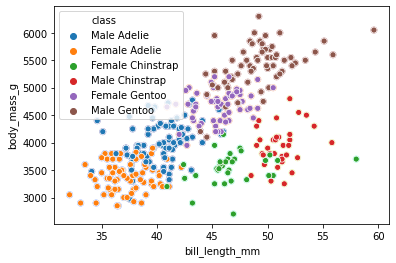

0.813953488372093


In [24]:
# Relationship between bill_lenght_mm and body_mass
two_features_plot(penguins_data['bill_length_mm'], penguins_data['body_mass_g'], penguins_data, classes)

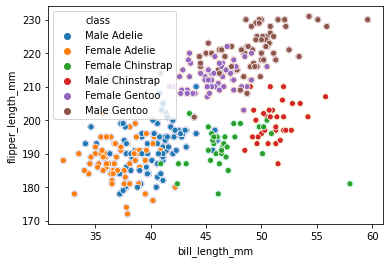

0.7790697674418605


In [25]:
# Relationship between bill_lenght_mm and flipper_length_mm

two_features_plot(penguins_data['bill_length_mm'], penguins_data['flipper_length_mm'], penguins_data, classes)

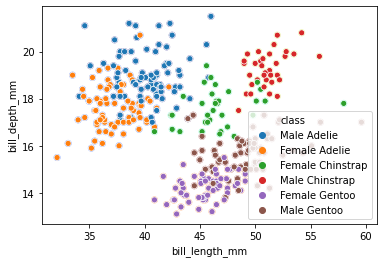

0.8604651162790697


In [26]:
# Relationship between bill_lenght_mm and bill_depth_mm

two_features_plot(penguins_data['bill_length_mm'], penguins_data['bill_depth_mm'], penguins_data, classes)

In [28]:
X_penguins = penguins_data.drop(['class', 'sex', 'species'], axis=1)
y_penguins = penguins_data['class']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
ypred = pd.Series(y_model, name='prediction')
predicted = pd.concat([Xtest.reset_index(), ytest.reset_index(), ypred], axis=1)
print(metrics.accuracy_score(ytest, y_model))
predicted

0.9420289855072463


,index,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,index,class,prediction
0,306,1,43.4,14.4,218.0,4600.0,306,4,4
1,341,1,50.4,15.7,222.0,5750.0,341,5,5
2,291,1,46.4,15.6,221.0,5000.0,291,5,5
3,102,1,37.7,16.0,183.0,3075.0,102,1,1
4,289,1,50.7,15.0,223.0,5550.0,289,5,5
...,...,...,...,...,...,...,...,...,...
64,89,2,38.9,18.8,190.0,3600.0,89,1,1
65,29,1,40.5,18.9,180.0,3950.0,29,0,0
66,58,1,36.5,16.6,181.0,2850.0,58,1,1
67,212,2,51.9,19.5,206.0,3950.0,212,3,3


In [29]:
def bayes_plot(df, model="gnb", spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2, hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=1)  # 80% training and 20% test

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)

    # Train Classifer

    prob = len(clf.classes_) == 2

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    hueorder = clf.classes_

    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)

    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:, 1] - Z[:, 0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)

    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder, palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

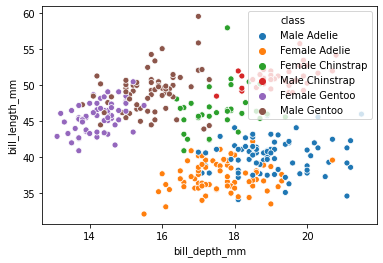

                  precision    recall  f1-score   support

   Female Adelie       0.92      0.75      0.83        16
Female Chinstrap       0.50      0.50      0.50         4
   Female Gentoo       1.00      1.00      1.00         7
     Male Adelie       0.76      0.89      0.82        18
  Male Chinstrap       1.00      0.86      0.92         7
     Male Gentoo       0.94      1.00      0.97        17

        accuracy                           0.87        69
       macro avg       0.85      0.83      0.84        69
    weighted avg       0.88      0.87      0.87        69



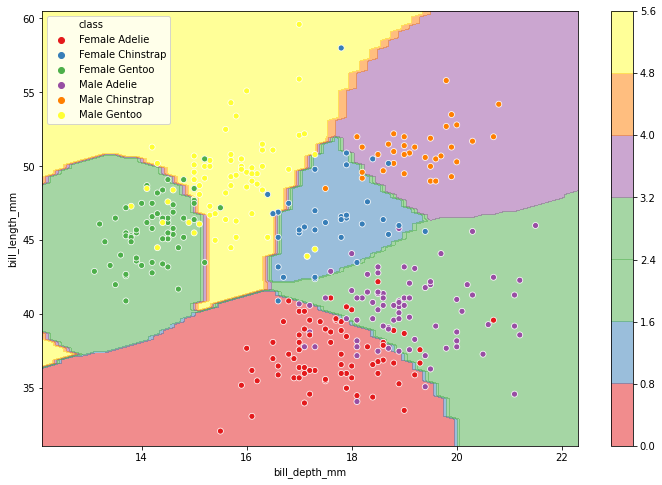

In [30]:
penguins_data['class'] = pd.DataFrame(np.where(penguins_data['class'] == 0, 'Male Adelie',
                                 (np.where(penguins_data['class'] == 1, 'Female Adelie',
                                (np.where(penguins_data['class'] == 2,'Female Chinstrap',
                                (np.where(penguins_data['class'] == 3, 'Male Chinstrap',
                                (np.where(penguins_data['class'] == 4, 'Female Gentoo', 'Male Gentoo'))))))))), columns=['spec'])
input_values = pd.concat([penguins_data.bill_depth_mm, penguins_data.bill_length_mm], axis=1)
target_values = penguins_data['class']
bayes_plot(pd.concat([input_values, target_values], axis=1), spread=1)

In [31]:
def get_wrong_predictions(feature1, feature2, data, spread=1):
    x = pd.concat([data[feature1], data[feature2]], axis=1)
    y = data['class']
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

    clf = GaussianNB()
    # if (model != "gnb"):
    #     clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(X_train, y_train)

    # Train Classifer

    prob = len(clf.classes_) == 2

    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

    x_min, x_max = x.loc[:, feature1].min() - 1, x.loc[:, feature1].max() + 1
    y_min, y_max = x.loc[:, feature2].min() - 1, x.loc[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    if prob:
        Z = Z[:, 1] - Z[:, 0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0, len(clf.classes_) + 3)

    prediction = clf.predict(x)
    predicted = pd.DataFrame(prediction, columns=['predicted'])
    data_with_prediction = pd.concat([x, y, predicted], axis=1)
    data_with_wrong_predictions = data_with_prediction.where(data_with_prediction['class'] != data_with_prediction['predicted'])
    data_with_wrong_predictions = data_with_wrong_predictions.dropna()

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)

    if not prob:
        plt.clim(0, len(clf.classes_) + 3)

    hueorder = clf.classes_
    sns.scatterplot(data=data_with_wrong_predictions[::spread], x=feature1, y=feature2, hue=y, hue_order=hueorder, palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

                  precision    recall  f1-score   support

   Female Adelie       0.93      0.74      0.82        19
Female Chinstrap       0.50      0.60      0.55         5
   Female Gentoo       0.90      1.00      0.95         9
     Male Adelie       0.78      0.91      0.84        23
  Male Chinstrap       1.00      0.89      0.94         9
     Male Gentoo       0.95      0.90      0.93        21

        accuracy                           0.86        86
       macro avg       0.84      0.84      0.84        86
    weighted avg       0.87      0.86      0.86        86



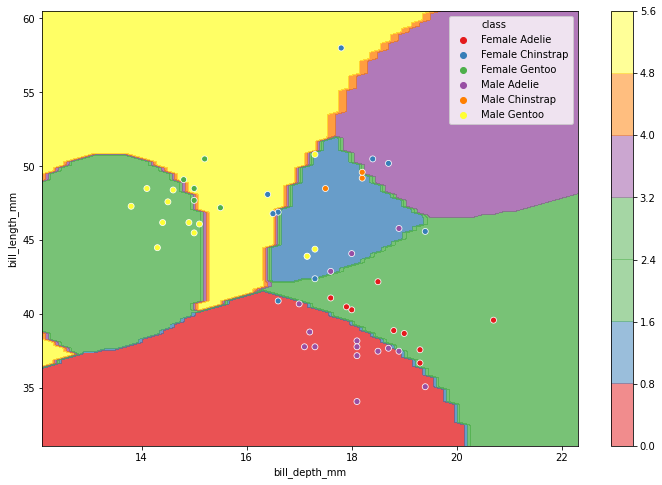

In [32]:
get_wrong_predictions('bill_depth_mm', 'bill_length_mm', penguins_data)